In [154]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import IPython
import os

%matplotlib inline

In [157]:
# 데이터 로드
base_path = './data/example/'
files = os.listdir('data/example')
files = ['zero.wav', 'one.wav', 'two.wav', 'three.wav', 'four.wav', 'five.wav', 'six.wav', 'seven.wav', 'eight.wav', 'nine.wav']

# { "zero.wav": {"sample_rate": 8000, "samples": [...]},
#   "one.wav": {"sample_rate": 8000, "samples": [...]},
#   ...
#   "nine.wav": {"sample_rate": 8000, "samples": [...]}}
sample_dict = {f: {'sample_rate': wavfile.read(base_path + f)[0], 'samples': wavfile.read(base_path + f)[1]} for f in files}

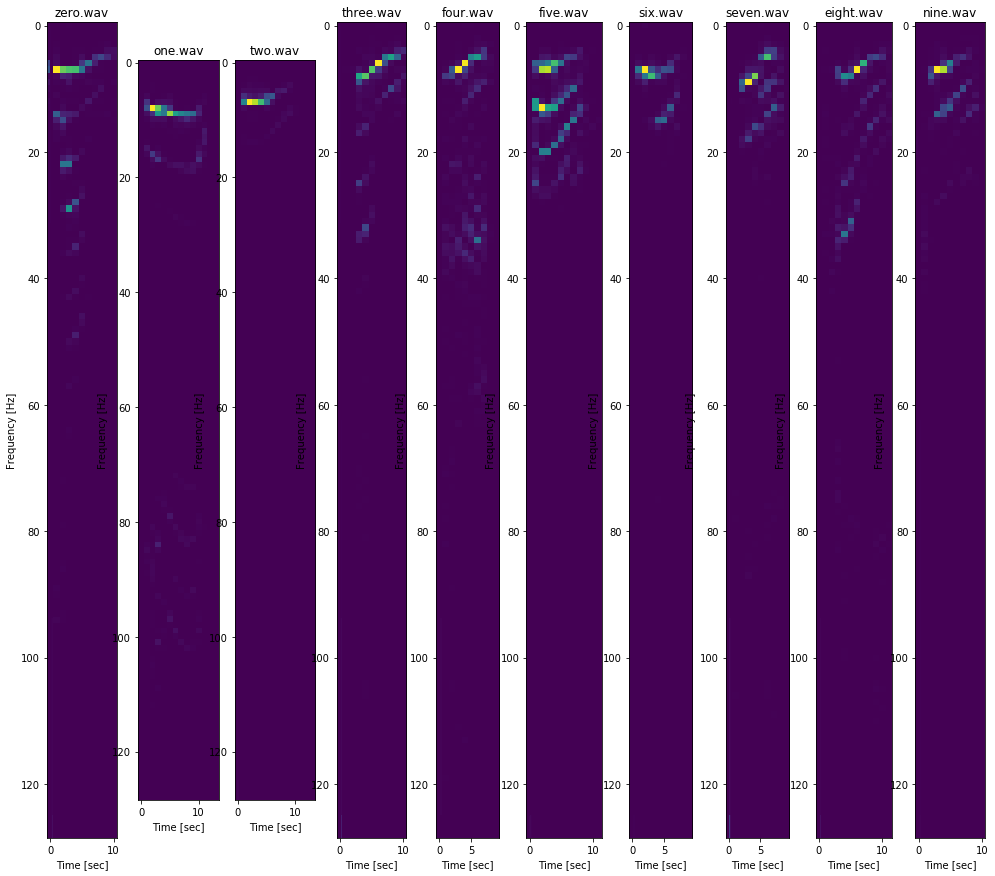

In [158]:
# Spectrogram (Scipy)

plt.figure(figsize=(17, 15))
for i, (file_name, value) in enumerate(sample_dict.items()):
    
    plt.subplot(1, 10, i + 1)
    frequencies, times, spectrogram = signal.spectrogram(value['samples'], value['sample_rate'])
    plt.pcolormesh(times, frequencies, spectrogram)
    plt.imshow(spectrogram)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    
    plt.title(file_name)

In [118]:
sample_dict['zero.wav']['samples']

array([  -5,  126,   65, ..., -172,  -78,  -21], dtype=int16)

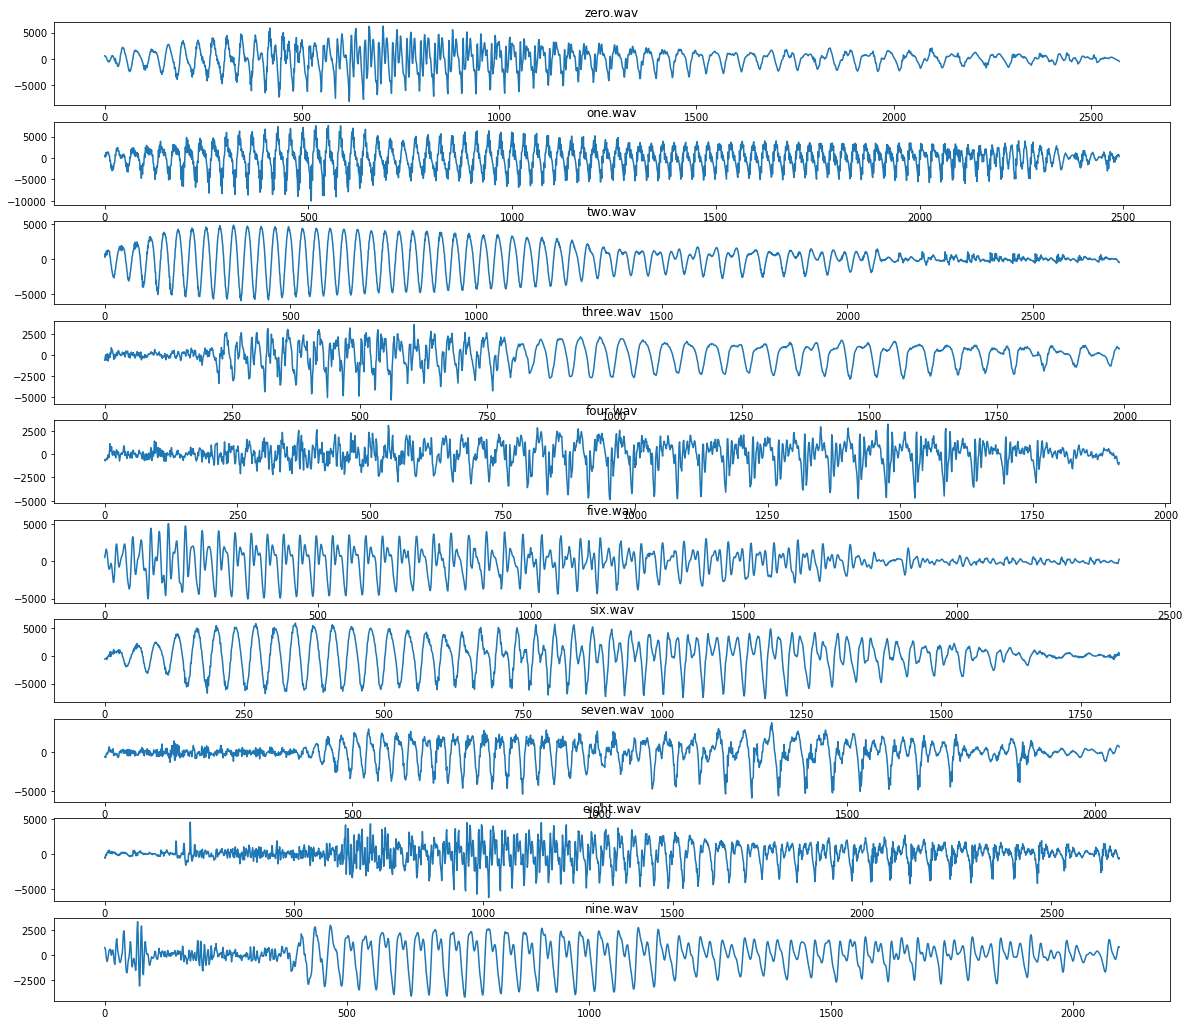

In [159]:
plt.figure(figsize=(20,18))

threshold = 500             # 임계값
cutted_samples = list       # 잘려진 샘플을 저장할 리스트 
for i, (file_name, value) in enumerate(sample_dict.items()):
    
    plt.subplot(10, 1, i + 1)
    
    start = 0
    end = 0
    for i, s in enumerate(value['samples']):
        if abs(s) > thre:
            start = i
            break

    for i, s in enumerate(np.flip(value['samples'])):
        if abs(s) > thre:
            end = i
            break
                 
    a = value['samples'][start:-end-1]
    cutted_samples.append(a)
    
    plt.plot(a)
    plt.title(file_name)

In [161]:
# 영
IPython.display.Audio(data=cutted_samples[0], rate=8000)

In [162]:
# 일
IPython.display.Audio(data=cutted_samples[1], rate=8000)

In [163]:
# 이
IPython.display.Audio(data=cutted_samples[2], rate=8000)

In [164]:
# 삼
IPython.display.Audio(data=cutted_samples[3], rate=8000)

In [165]:
# 사
IPython.display.Audio(data=cutted_samples[4], rate=8000)

In [166]:
# 오
IPython.display.Audio(data=cutted_samples[5], rate=8000)

In [167]:
# 육
IPython.display.Audio(data=cutted_samples[6], rate=8000)

In [168]:
# 칠
IPython.display.Audio(data=cutted_samples[7], rate=8000)

In [169]:
# 팔
IPython.display.Audio(data=cutted_samples[8], rate=8000)

In [170]:
# 구
IPython.display.Audio(data=cutted_samples[9], rate=8000)

In [83]:
spectrogram.shape

(129, 12)

In [84]:
frequencies.shape

(129,)

In [85]:
times.shape

(12,)

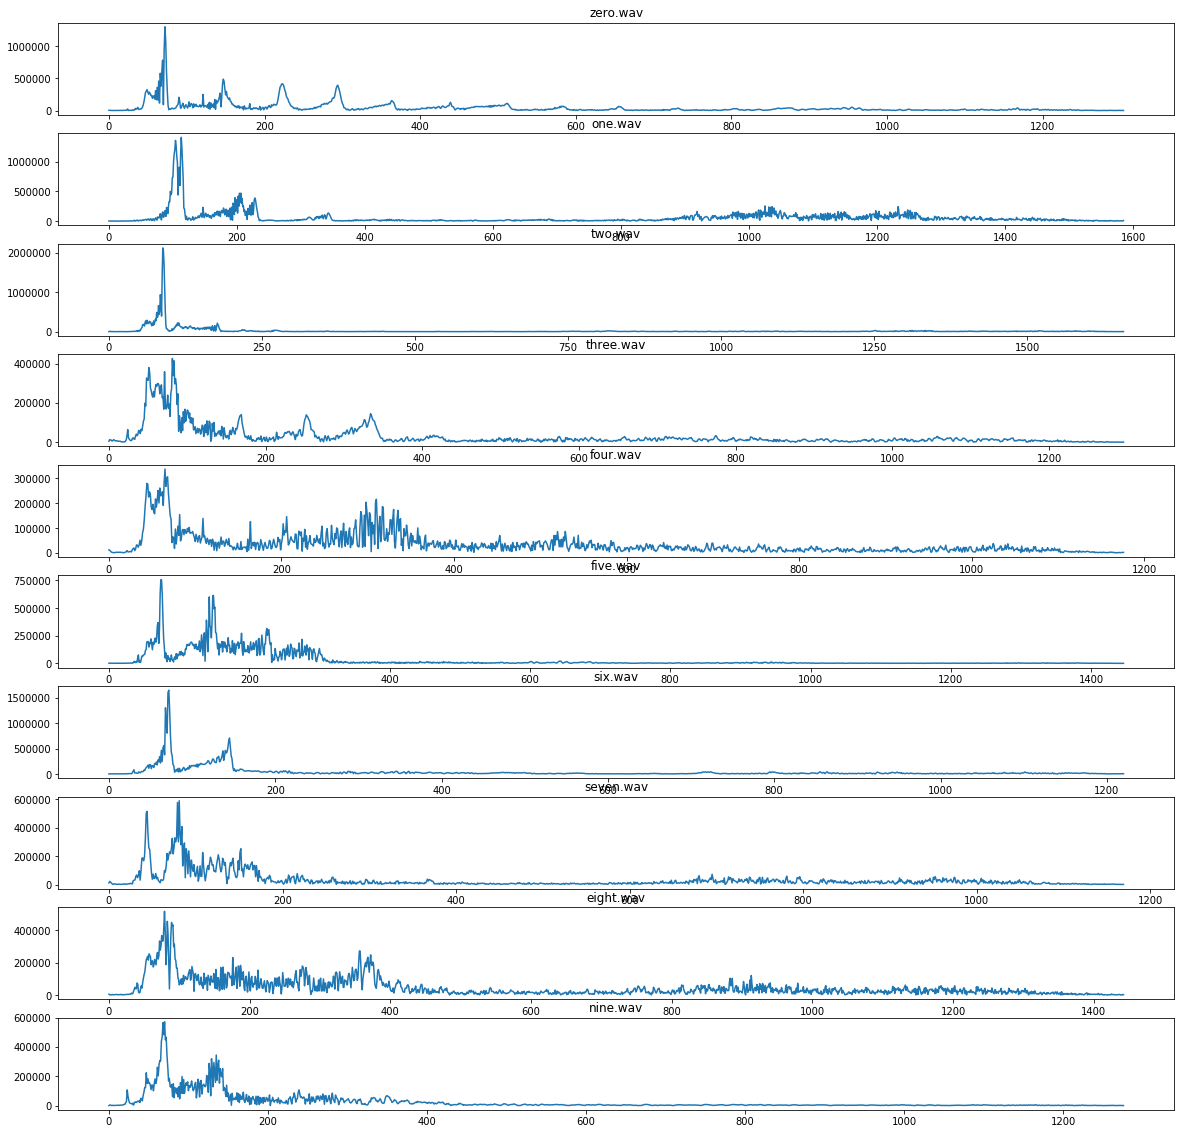

In [171]:
# fft (scipy)
from scipy.fftpack import fft, ifft

plt.figure(figsize=(20, 20))
for i, (file_name, value) in enumerate(sample_dict.items()):
    
    plt.subplot(10, 1, i + 1)
    a = fft(value['samples'])
    plt.plot(abs(a[:len(a)//2]))
    plt.title(file_name)

In [109]:
import numpy as np

a

array([  354.           +0.j        , -1407.17709482-3586.03898088j,
       -4200.28683783+1170.27792992j, ..., -1244.96130437 +394.65325912j,
       -4200.28683783-1170.27792992j, -1407.17709482+3586.03898088j])

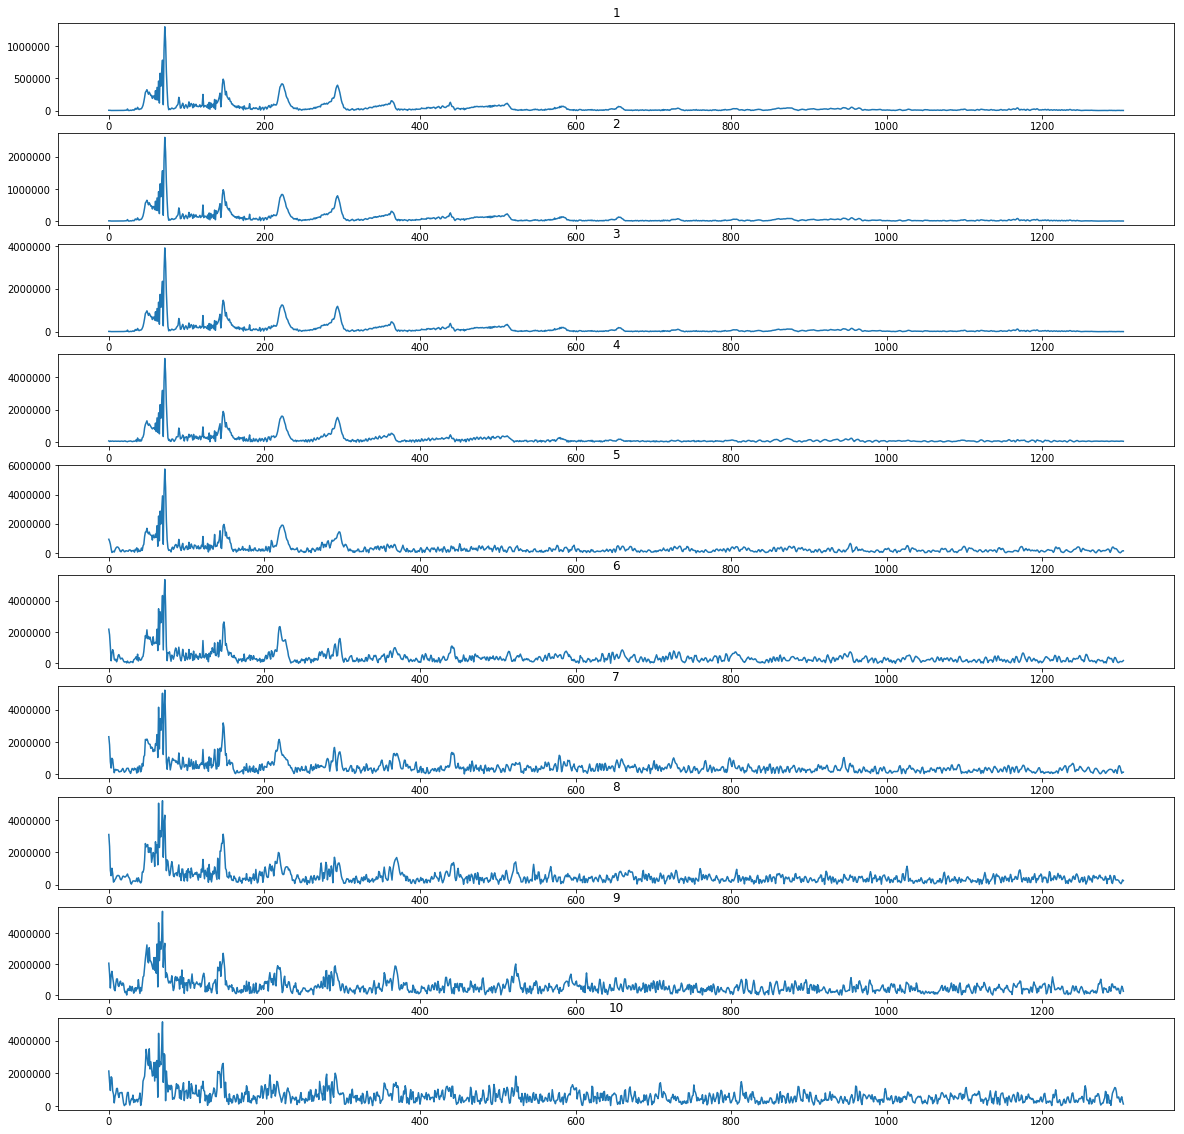

In [117]:
plt.figure(figsize=(20, 20))
for i in range(10):
    
    plt.subplot(10, 1, i + 1)
    a = fft(sample_dict['zero.wav']['samples'] * (i + 1))
    plt.plot(abs(a[:len(a)//2]))
    plt.title(i + 1)